In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('train.csv')

# Quick look
print(data.head())

# Basic preprocessing:
# 1. Drop columns with too many missing values (threshold can be changed)
missing_threshold = 0.5
data = data.loc[:, data.isnull().mean() < missing_threshold]

# 2. Fill missing numeric values with median
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].median(), inplace=True)

# 3. Fill missing categorical values with mode
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# 4. Encode categorical features using Label Encoding
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Separate features and target
X = data.drop(['SalePrice', 'Id'], axis=1)
y = data['SalePrice']

# Initialize K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scores = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Initialize and train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict and evaluate
    preds = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    rmse_scores.append(rmse)

print("RMSE scores for each fold:", rmse_scores)
print("Average RMSE:", np.mean(rmse_scores))


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

C:\Users\user\AppData\Local\Temp\ipykernel_9612\1695123685.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_9612\1695123685.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

RMSE scores for each fold: [34281.6689539673, 35471.87218890515, 58298.67876617794, 29999.496586620706, 22713.028143815656]
Average RMSE: 36152.94892789735


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('train.csv')

# Quick look
print(data.head())

# Basic preprocessing:
# 1. Drop columns with too many missing values (threshold can be changed)
missing_threshold = 0.5
data = data.loc[:, data.isnull().mean() < missing_threshold]

# 2. Fill missing numeric values with median
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col] = data[col].fillna(data[col].median())

# 3. Fill missing categorical values with mode
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# 4. Encode categorical features using Label Encoding
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Separate features and target
X = data.drop(['SalePrice', 'Id'], axis=1)
y = data['SalePrice']

# Initialize K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scores = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Initialize and train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict and evaluate
    preds = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    rmse_scores.append(rmse)

print("RMSE scores for each fold:", rmse_scores)
print("Average RMSE:", np.mean(rmse_scores))


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

RMSE on test set: 34281.67


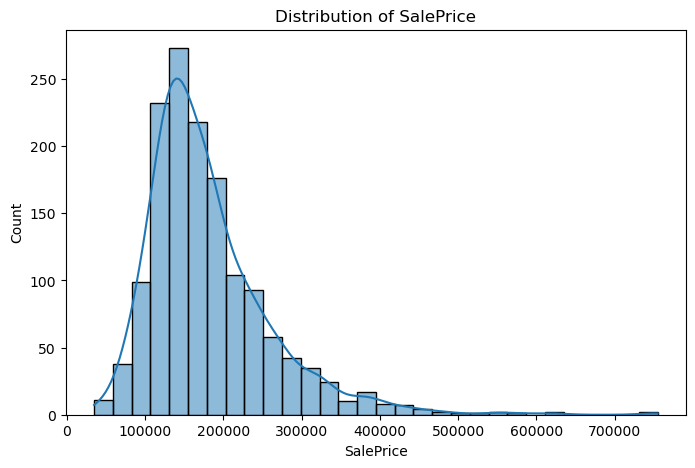

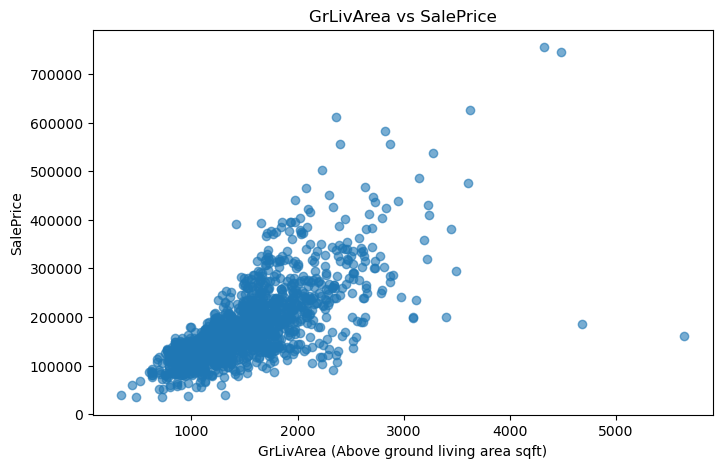

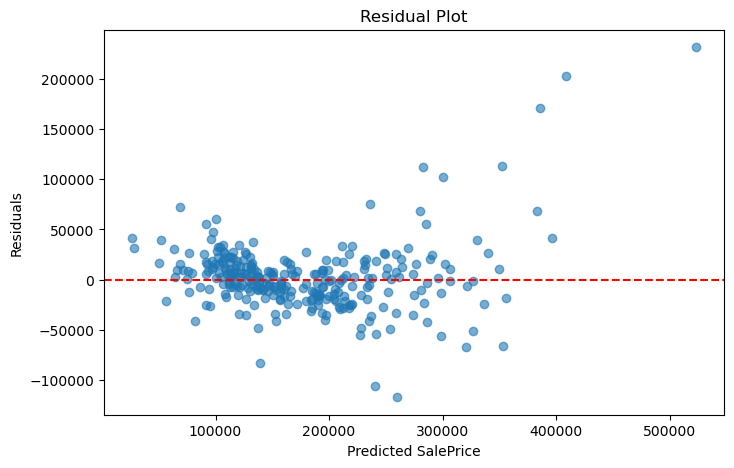

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv('train.csv')

# Basic preprocessing
# Drop columns with too many missing values
missing_threshold = 0.5
data = data.loc[:, data.isnull().mean() < missing_threshold]

# Fill missing numeric columns with median
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col] = data[col].fillna(data[col].median())

# Fill missing categorical columns with mode
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Features and target
X = data.drop(['SalePrice', 'Id'], axis=1)
y = data['SalePrice']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE on test set: {rmse:.2f}')

# --- Plot 1: Histogram of SalePrice ---
plt.figure(figsize=(8,5))
sns.histplot(y, bins=30, kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.show()

# --- Plot 2: Scatter plot GrLivArea vs SalePrice ---
plt.figure(figsize=(8,5))
plt.scatter(data['GrLivArea'], data['SalePrice'], alpha=0.6)
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea (Above ground living area sqft)')
plt.ylabel('SalePrice')
plt.show()

# --- Plot 3: Residual plot ---
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.show()


In [7]:
git remote add origin https://github.com/teju-sh/HousePriceML.git
git branch -M main
git push -u origin main

SyntaxError: invalid syntax (3038994843.py, line 1)